# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Raunit Kohli
- Saarthak Trivedi 
- Dhaval Jani
- Mohammad Alkhalifah

# Abstract 

This project aims to develop a machine learning model that predicts song view counts based on features such as language, genre, and lyrics in an effort to assist music recommendation systems and musical artists. The project utilizes a dataset of over 5 million songs' metadata collected from online music recommenders. This metadata, including lyrics and statistical properties, is feature engineered using a collection of encoding and embedding techniques to effectively use the data in a quantitative supervised Machine Learning model. A regression model, such as Random Forest algorithms, will be used to predict an upper and lower bound of view counts for a song based on its features. The model will be improved through a series of cross-validations, and then evaluated using metrics such as a Mean Absolute Error and R-squared score. 

### TODO: ^EDIT to fix...

# Background

Music platforms such as Spotify and Apple Music have been employing the use of recommender systems for a years now. Built on a series of algorithms, these platforms will maintain a massive database of songs and their attributes, and recommend certain music selections to individuals based on past music taste and popular streams. However, with these algorithms getting more advanced, song recommendations are getting very specialized based on clustering and clouds of similarity<a name="recsystem"></a>[<sup>[1]</sup>](#recsystem). 

Song popularity is constantly changing and is usually based on all-time views but also number of shares, pre-saves, and recent popularity.<a name="popularity"></a>[<sup>[2]</sup>](#popularity). When recommeding new music, platforms will try to recommend new music uploads to build a profile on individuals and spread releases to gain popularity. Yet, because of the recommender algorithm basing profiles on clustering techniques, and the fact that popularity of a song is measured by more factors than just all-time views, it's possible that the songs recommended as popular are in fact not the most popular songs<a name="popularity"></a>[<sup>[2]</sup>](#popularity). 

A series of studies have been completed on the topic of music recommender systems and how they choose the popular songs that are recommended. One specific paper shows that in the United States, especially songs in languages other than english or from non-American artists are less likely to be recommended to individuals even if all other attributes of the song's metadata match up with the user's preferences<a name="survey"></a>[<sup>[3]</sup>](#survey). This means that recommender systems for music need to be improved so that total views has a more balanced influence on music choices. 

Having a good algorithm for predicting the view count of a song based on its other features allows recommender systems to more effectively suggest relevant songs. It can also help music artists and record labels better understand the features necessary in a song for it to be popular.

# Problem Statement

The problem at hand is to develop a machine learning model that accurately predicts the range of the number of views/plays a song will receive based on various factors such as language, genre, lyrics and other relevant attributes. The goal is to leverage a database containing over 3 million songs and their corresponding play/view counts to build a robust predictive model. We can express it in mathematical terms by defining the target variable (number of views/plays) as a continuous numerical value. The model's prediction range can be quantified as a lower bound and an upper bound estimate. Since we have access to a vast database of songs with their historical view/play counts. We can train and evaluate the model using this data, observing the predicted ranges against the actual counts to determine its efficacy. Furthermore, the model's performance can be measured and compared across different subsets of the dataset or on new unseen songs to validate its generalizability. The model can be trained and evaluated multiple times using various subsets of the dataset or with different feature combinations to explore different hypotheses and improve its predictive capabilities.

### Todo: ^Edit

# Data

The dataset we will primarily be using is a dataset found from kaggle with stores songs and their metadata from genius  (https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information). The format is a csv file with over five million observations. There are 11 different features for each data point. Each observation refers to a single song, and the features are the title, tag (aka genre), artist name, year, features on the song, the genius identifier, and three seperate language features. Out of all the features, the critical ones include the title, artist name, features, year, and language as these will all aid heavily in helping predict the view counts. The datapoints also include the viewcount of the song, enabling supervison with these counts as labels. The features are represented in the dataset as mostly strings and integers, however we intend to use one-hot encoding and label encoding to convert categorical features like genre, artist, and language into numerical format. For the lyrics, we will employ Natural Language Processing (NLP) techniques, like word embeddings, to extract meaningful features. Finally, for numerical features, we will apply standard scaling to bring them to a similar scale.

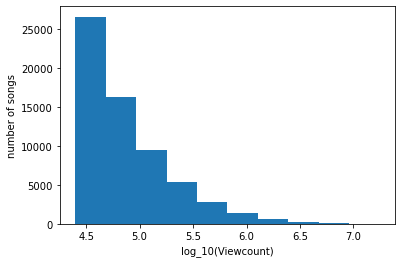

In order to get another look at some of the data, we can make some plots. We see the spread of the various genres in the data:

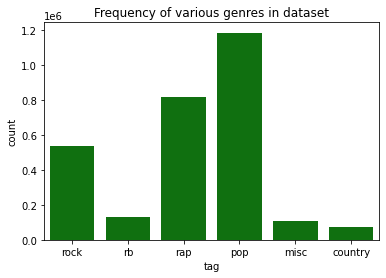

Further, we can look at the data in terms of views plotted against the year of the song's release date, where we see more views correlated to more recent releases.

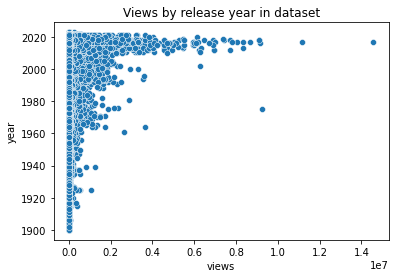

The below code is used to read in the raw zipped file with the data we got from Kraggle. We remove uncessary columns and drop duplicates. We drop the surplus columns for language, and only include the main language column. Through some minor EDA we decide to isolate the data to only include english songs (the reason for this is that in order for titles and lyrics to be used as a feature for predicting view count, we need to have the encodings present the same semantic information. This requires us to translate all the lyrics and titles into a single language. Doing so is currently unfeasable, which is why we will begin with just english songs). We then compress the dataframe to a feather format for future use.

```
# !pip install pyarrow
# !unzip data.zip

import pandas as pd
import numpy as np
import pyarrow.feather as feather

data = pd.read('lyrics.csv')
data.head()
data.describe()

data = data[data['language'] == 'en'] # drop all non-english songs
data.reset_index(inplace=True)
data.drop(columns=['index', 'id', 'language_3di', 'language_id'], inplace=True)
data.drop_duplicates()

data['year'].value_counts()
data[data['year'] < 100]
data["song_age"] = 2023 - data["year"]
data.drop(columns=['year'])
```

As we can see above, the data contains music that was dated to years before the invention of technology. Some of these songs are in fact valid, mostly because they are verses from religious texts or ancient scripts and are therefore dated to back then. However the majority of these songs are just incorrectly labeled. Therefore, we will remove all songs that are dated before 1900 and after 2023. We will then convert the year to the song age since 2023 and then delete the year column.

We now split the data into training and testing sets, then save them as feather files to easily load them in for analysis and training.

```
from sklearn.model_selection import train_test_split

X = data.drop(columns=['views'])
y = data['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=28)

data_test = X_test
data_test['views'] = y_test
feather.write_feather(data_test, 'testing_data_feather')

data_train = X_train
data_train['views'] = y_train
feather.write_feather(data_train, 'training_data_feather')
```

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

The proposed solution for this problem is to employ a supervised machine learning approach, specifically a regression model, to predict lower and upper bounds for song views based on given song features. The model will leverage the dataset of over 3 million songs, which includes features like genre, artist, language, title, lyrics, and year of release. 

We plan to employ ensemble methods, particularly using deep learning, Recurrent Neural Networks (RNNs), for lyrics analysis. To handle combining the lyrics analysis with the rest of the features we propose to use Random Forest algorithms because of their potential to handle complex, non-linear relationships, and mitigate overfitting. The model will be implemented using the Scikit-learn, TensorFlow, and Keras libraries in Python. Scikit-learn will be used for pre-processing, feature selection, and training traditional machine learning models. TensorFlow and Keras will be used for the implementation of deep learning part. 

The performance of the models will be evaluated using metrics such as Mean Absolute Error (MAE) and R-squared (R2) score, which are common performance metrics for regression problems. We will perform k-fold cross-validation to assess the model's performance and its robustness across different subsets of the data. We think that this solution might work as it leverages the power of both traditional machine learning and deep learning capturing both linear and non-linear patterns in the data. Furthermore, the use of a large dataset increases the likelihood of the model generalizing well to unseen data.

### Todo: ^Edit

# Evaluation Metrics

As mentioned previously, we have supervision in the form of viewcount labels associated with each datapoint in the dataset. Since the predicion and target are numerical values, we can use various evaluation metric such as mean absolute error (MAE), mean squared error (MSE) or root mean square error (RMSE), to assess the model accuracy in predicting the view/play counts. Since our predictions are will be represented as a continuous numerical value, to compute the accuracy, we can use the midpoint value of the range as our prediction. These would have the following form:

$$MAE = \frac{1}{N}\sum_{i=1}^{N}|\hat{y}_{i}-y_{i}|$$
$$MSE = \frac{1}{N}\sum_{i=1}^{D}(\hat{y}_{i}-y_{i})^2$$
$$RMSE = \frac{1}{N}\sqrt{\sum_{i=1}^{D}(\hat{y}_{i}-y_{i})^2}$$

Where $\hat{y}$ are the predictions and $y$ are the labels.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Delete this cell
- Provide an explanation for how we cut down on the data size, what columns we removed and why, what we decided to do for each column, and what we will be experimenting with (and what we think each experiment will do).
- Also we all just add in random code...
- NOTE: one-hot encoding and z-scoring uses the entire distribution of data; embedding uses an external library to embed => therefore it's okay to embed beforehand but not z-score or one-hot encode.



- Dhaval: Explain what data was dropped and also what columns were dropped
- Raunit: Expand the features column and explain why
- Mohammad: Experiment with embedding using GPT and HuggingFace (write out what worked best or what issues arose)
- Saarthik: Experiment with regexing the lyrics (punctuation, etc.)

First we need to decide on encoding vs word embedding for categorical features:

- Lyrics and titles should absolutely be word embedded because we require their semantic information.
- Given the size of the dataset, one-hot encoding the artists would make the size of the data enormous, as we would be in a very high-dimensional feature space. There are 428304 unique artists represented in the dataset, so one-hot encoding would be very inefficent.
- However, the names of artists and features definitely have an essential contribution to the success of a song so having a binary variable for the presence of an artist will have significant impact.
- Word embedding captures semantic information so artists and features could potentially be related better with embeddings rather than encodings, however this seems unlikely given they are names.

Solution: We will one-hot encode the tags as there are only 6 unique tags. Yet, instead of embedding or one-hot encoding the artists, we will label encode the artist and feature names. This means we can encode the artists so they can be used for feature analysis, but will not transform into an insanely large feature space.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.feather as feather
import torch
from tqdm.notebook import tqdm
tqdm.pandas()
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
```

```
file_name = 'training_data_feather'
df = pd.read_feather(file_name)
data = df.sample(n=100000, random_state=1) # we'll start with a smaller sample to try feature selections
```

#### Word Embedding the Titles and Lyrics

```
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
```

```
def sentence_embedding(sentence, model, max_length=512):
    model.max_seq_length = min(len(sentence), max_length) 
    sentence_embedding = model.encode(sentence,show_progress_bar=False)
    return sentence_embedding
```

```
# Embedding the titles 
data["title_vector"] = data["title"].progress_apply(sentence_embedding, model= model) 
title_embeddings = np.vstack(data["title_vector"].values)
title_embeddings = pd.DataFrame(title_embeddings)
title_embeddings
```

```
# Embedding the lyrics 
data["lyrics_vector"] = data["lyrics"].progress_apply(sentence_embedding, model= model) 
lyrics_embeddings = np.vstack(data["lyrics_vector"].values)
lyrics_embeddings = pd.DataFrame(lyrics_embeddings)
lyrics_embeddings
```

```
#Rename the columns
def rename_columns(df, s):
    new_columns = ["{}{}".format(s ,i) for i in range(len(df.columns))]
    df.columns = new_columns
    return df

title_embeddings = rename_columns(title_embeddings, "Title")
lyrics_embeddings = rename_columns(lyrics_embeddings, "Lyrics")
```


```
#### Encoding the other features of the data
# tags one hot encoding:
tag_ohe = OneHotEncoder()
tag_onehot = tag_ohe.fit_transform(data["tag"].values.reshape(-1, 1))
tagOH = pd.DataFrame(tag_onehot.todense())

artist_le = LabelEncoder()
data["artist"] = artist_le.fit_transform(data["artist"])
```

One issue we can notice at this point is that while label encoding the artists, not all features match the artists. For example, "Cam'ron" is an artist and "Cam\\'ron" is a feature. These clearly refer to the same person, however we will need to (1) clean the features so they match the same format as the artists, and (2) use the same label encoder as the artists so that their encodings match. 

```
# Features... TODO: Match with the artist 
# def get_featured_artists(features):
#     if features == "{}":
#         return []
#     else:
#         return features.strip("{}").split(",")
# 
# data["feat_artists"] = data["features"].progress_apply(get_featured_artists)
# all_feat_artists = list(set(np.concatenate(data["feat_artists"].values)))
# artists_le.fit(all_feat_artists)
# data["feat_artists_encoded"] = data["feat_artists"].progress_apply(lambda x: artists_le.transform(x) if x else [])
```

#### Combine data and start ML

```
data1 = data[["artist", "song_age", "views"]].reset_index(drop = True)
X = pd.concat([title_embeddings,lyrics_embeddings, tagOH,  data1[["artist", "song_age"]] ], axis = 1)
y = data1["views"]
```

```
# Create a k-fold cross-validator
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Define models and their hyperparameters
models_and_hyperparameters = {
    "xgb": {
        "model_class": XGBRegressor,
        "parameters": {
            "objective": ["reg:squarederror"],
            "n_jobs": [-1],
            "random_state": [42],
            "max_depth": [3, 6],
            "learning_rate": [0.05, 0.1],
            "tree_method":['gpu_hist']
        }
    },
    "lgbm": {
        "model_class": LGBMRegressor,
        "parameters": {
            "objective": ["regression"],
            "n_jobs": [-1],
            "random_state": [42],
            "max_depth": [3, 6],
            "learning_rate": [0.05, 0.1]
        }
    },
}
```

```
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
```

```
best_models = {}

for model_name, model_and_params in models_and_hyperparameters.items():
    print(f"Training {model_name}...")
    model_class = model_and_params["model_class"]
    parameters = model_and_params["parameters"]

    model = model_class()
    grid_search = GridSearchCV(model, parameters, scoring="neg_mean_squared_error", cv=kfold, n_jobs=2, verbose=10)
    print(f"Fitting {model_name}...")
    grid_search.fit(X, y)

    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best MSE for {model_name}: {-grid_search.best_score_}")
```

# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

While the goal of this project is predict the views, ultimately it might be used in recommendation systems or by artists. Hence, it's important to consider potential ethical issues and implications related to data privacy, as well as possible unintended consequences. If the model prioritizes songs predicted to have high view counts, it might stifle diversity and reinforce a popularity echo chamber. To address this, we could consider incorporating some measure of diversity or novelty into our model while addressing these concerns. One potential ethical concern is the possibility of bias in our model. For instance, if the training data is skewed towards certain genres, languages, or artists, our model may inadvertently favor those groups when predicting views. We'll carefully examine our dataset for such biases and consider techniques such as resampling or weighting to mitigate them. We will ensure transparency by documenting our methodology, acknowledging limitations, and being open to feedback. 

# Team Expectations 

* We will communicate often using the established text group chat we have for our group
* We will reply within 24 hours in the text group if asked specifically
* We will attend reguarly scheduled meetings and be proactive to ensure our attendance at those meetings
* We will divide the work for the project equitably and ensure everyone completes a fair amount of work
* We will utilize a deomcratic process to vote on decisions in the project (and use a coin-flip to break ties)
* We will send an email outlining the requirements of a member to any team member who is non-cooperative

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/12  |  1 PM | First meeting | Brainstorm topics/questions Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research/looking into CSV files | 
| 5/15  |  3 PM |  Chose topic and found supporting dataset on kaggle | Discuss how to complete proposal, potential evaluation metrics, and what we shoul predict | 
| 5/17  | 6 PM  | Edit, finalize, and submit proposal  | Discuss data wrangling and EDA and possible analytical approaches; Assign group members to lead each specific part|
| 5/26  | 7 PM  | Import & Wrangle Data ,do some EDA (Raunit and Muhammad) | Continue reviewing/editing/wrangling/EDA; Discuss Analysis Plan   |
| 5/31  | 1 PM  | Finalize wrangling/EDA; Begin programming for project (All) | Complete EDA,seperating into training data, creating graphs, tokenizing data |

# Footnotes

<a name="recsystem"></a>1.[^](#recsystem): Pastukhov, Dmitry. “Inside Spotify’s Recommender System: A Complete Guide to Spotify Recommendation Algorithms.” https://www.music-tomorrow.com/blog/how-spotify-recommendation-system-works-a-complete-guide-2022#:~:text=%22We%20can%20understand%20songs%20to,recommend%20song%20Z%20to%20them.<br>

<a name="popularity"></a>2.[^](#popularity):“Song Popularity on Spotify – How It Works: Pansentient League.” Pansentient League | Spotify and Synthpop, 15 Nov. 2016, pansentient.com/2009/09/spotify-song-popularity/. <br>

<a name="survey"></a>3.[^](#survey):Song, Yading & Dixon, Simon & Pearce, Marcus. "A Survey of Music Recommendation Systems and Future Perspectives". Proceedings of The 9th International Symposium on Computer Music Modeling and Retrieval, 2012.  https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=e0080299afae01ad796060abcf602abff6024754
